<a href="https://colab.research.google.com/github/vkayonline/US-COVID19-Forecasting/blob/main/TSF_CT2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. Read the data and do exploratory data analysis. Describe the data briefly and interpret the inferences for each. Initial steps like head() .info(), Data Types, etc .

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/vkayonline/US-COVID19-Forecasting/main/datasets/us_covid19_daily.csv')
data.head()

,Date,Positive,Hospitalized,Death
0,17-03-2020,10021,325,124
1,18-03-2020,13385,416,155
2,19-03-2020,18085,617,203
3,20-03-2020,24197,1042,273
4,21-03-2020,31013,1492,335


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [ ]:
data.head()

,Positive,Hospitalized,Death
Date,,,
2020-03-17,10021,325,124
2020-03-18,13385,416,155
2020-03-19,18085,617,203
2020-03-20,24197,1042,273
2020-03-21,31013,1492,335


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2020-03-17 to 2020-06-12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Positive      265 non-null    int64
 1   Hospitalized  265 non-null    int64
 2   Death         265 non-null    int64
dtypes: int64(3)
memory usage: 8.3 KB


2. Check for null values. Display appropriate plots for the columns and discuss inference from the plots and summary stats. Check for null values.

In [ ]:
data.isna().sum()

Positive        0
Hospitalized    0
Death           0
dtype: int64

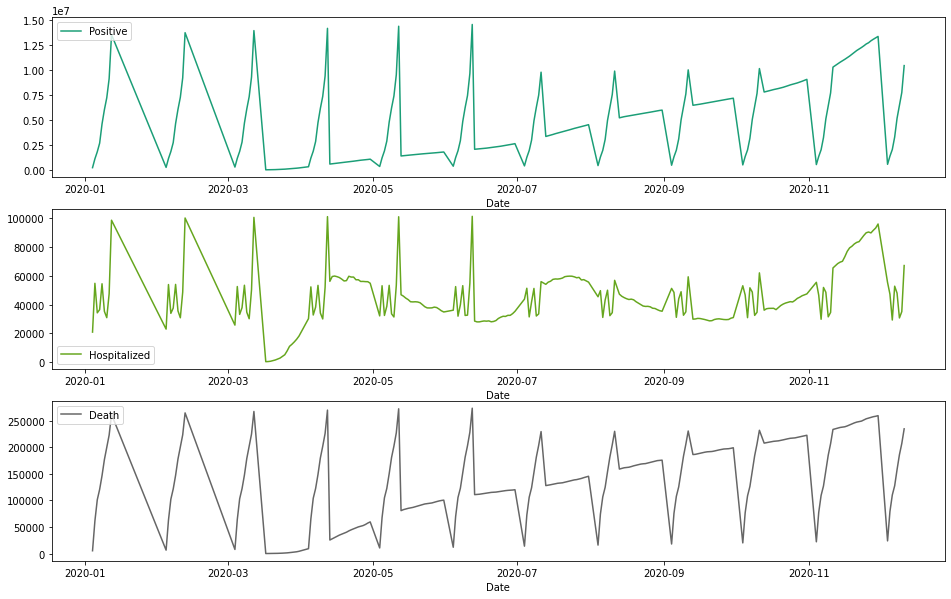

In [ ]:
data.plot(colormap='Dark2',
               figsize=(16, 10),
               subplots=True,
               sharex=False,
               sharey=False)           
plt.show()

3. Display boxplot to find the distribution of the variable ‘hospitalized’ and interpret your inferences. Perform boxplot for month wise distribution of the same and explain your inferences.

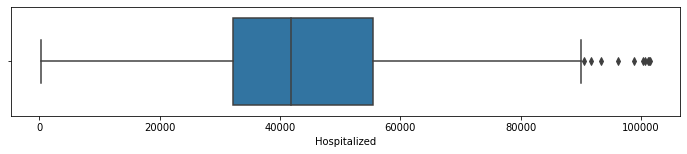

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Hospitalized'],whis=1.5)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32828a1350>,
      dtype=object)

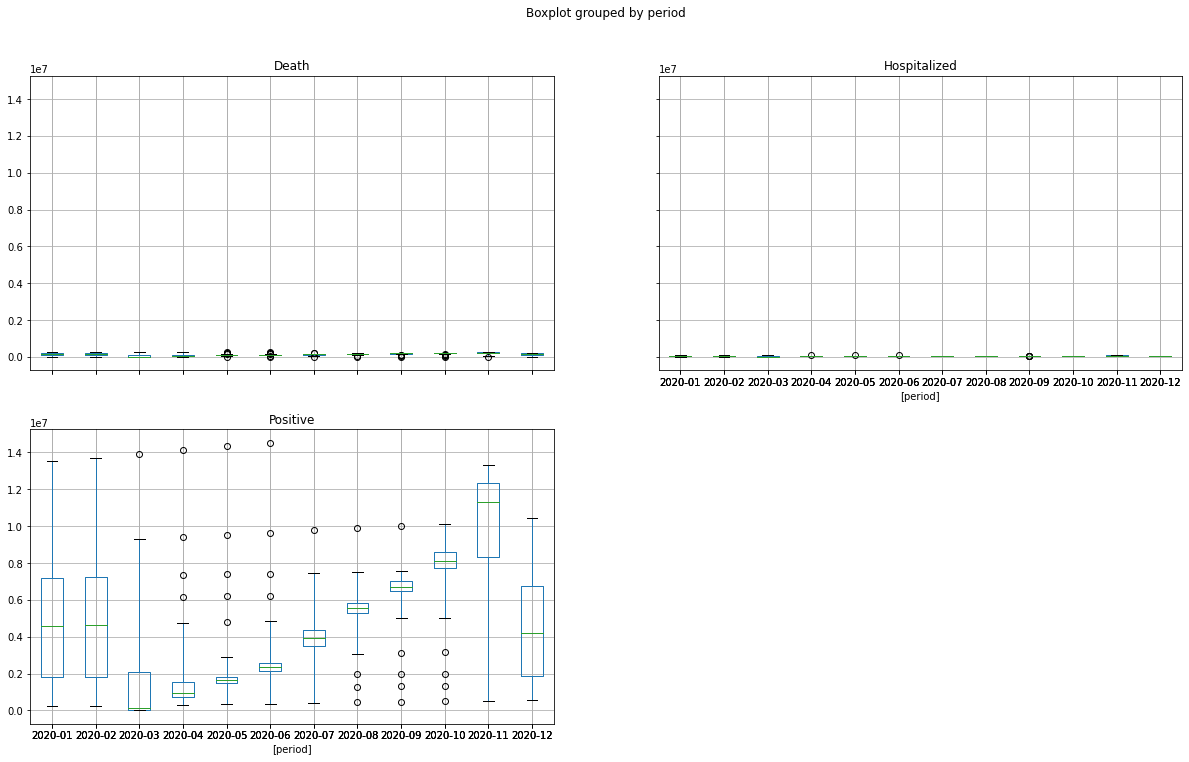

In [ ]:
data['period'] = data.index.to_period('M')
data.head()
data.boxplot(by='period',whis=5.0,figsize=(20,12))

4. Perform decomposition of the time series data.

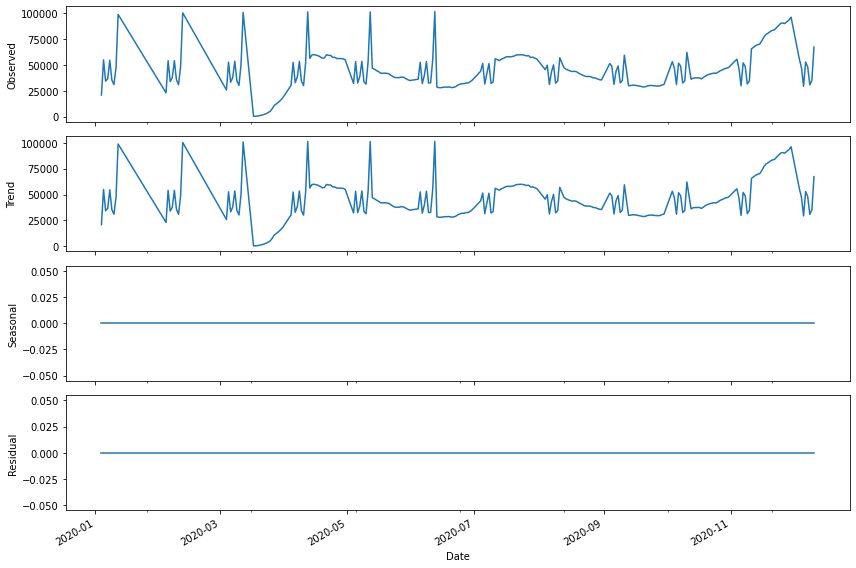

In [57]:
### Additive Decomposition
from pylab import rcParams
import statsmodels.api as sm
# //data.sort_index(inplace=True)
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(x=data['Hospitalized'], model='additive',extrapolate_trend='freq', freq=1) # additive seasonal index
fig = decomposition.plot()
plt.show()

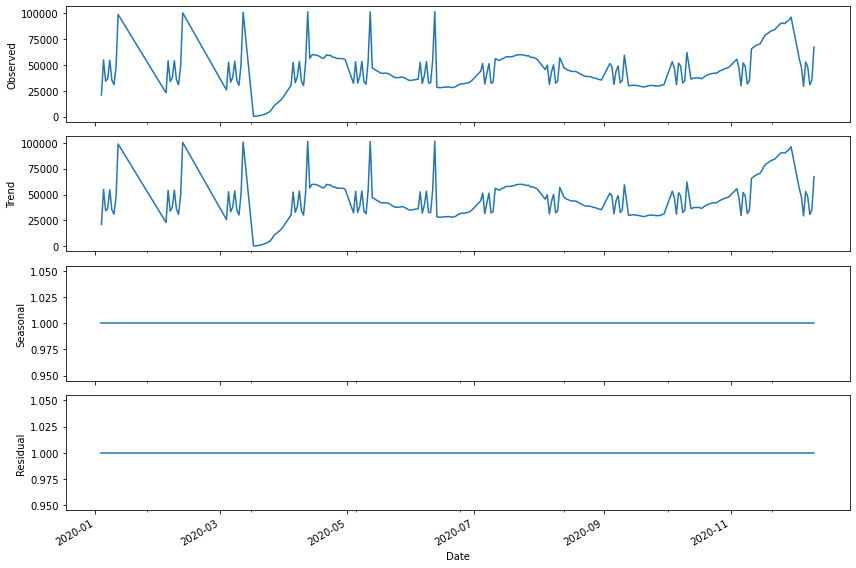

In [58]:
### Multiplicative Decomposition
decomposition = sm.tsa.seasonal_decompose(x=data['Hospitalized'], model='multiplicative',extrapolate_trend='freq', freq=1) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

5. Is the data stationary? Plot original data and the rolling mean and standard deviation with window = 15. Perform statistical tests to confirm the stationarity of the data.

6. Plot ACF and PACF plots for the series.

7. Declare the feature vector and split the data into training and test sets. Consider the data before 06-11-2020 for training data and the rest for the test set.

In [61]:
### Splitting Data into Train and Test
train = data.loc['17-03-2020':'11-06-2020']
test = data.loc['11-06-2020':]

8. Perform Simple average model, Exponential Model, AR, MA and ARIMA Model,Compare the Evaluation metrics of the models and interpret your inferences.

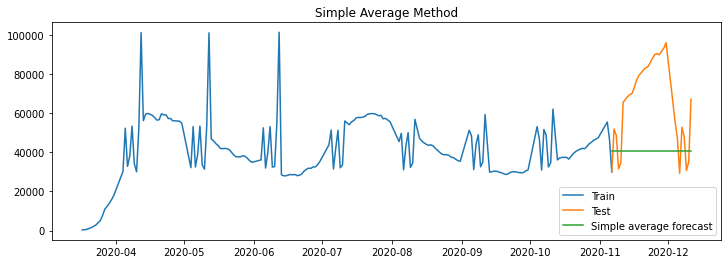

In [ ]:
### Simple Average Method
y_hat_avg = test.copy()
y_hat_avg['simple_avg_forecast'] = train['Hospitalized'].mean()
plt.figure(figsize=(12,4))
plt.plot(train['Hospitalized'], label='Train')
plt.plot(test['Hospitalized'], label='Test')
plt.plot(y_hat_avg['simple_avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Hospitalized'], y_hat_avg['simple_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Hospitalized']-y_hat_avg['simple_avg_forecast'])/test['Hospitalized'])*100,2)

results = pd.DataFrame({'Method':['Simple average method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,33420.34,39.69


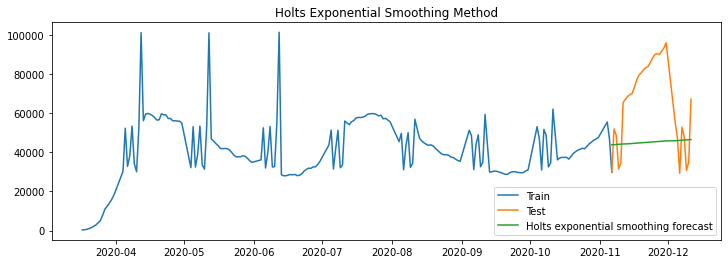

In [56]:
### Holt's Exponential Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Hospitalized']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)

y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

plt.figure(figsize=(12,4))
plt.plot( train['Hospitalized'], label='Train')
plt.plot(test['Hospitalized'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label="Holts exponential smoothing forecast")
plt.legend(loc='best')
plt.title('Holts Exponential Smoothing Method')
plt.show()

In [55]:
rmse = np.sqrt(mean_squared_error(test['Hospitalized'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Hospitalized']-y_hat_holt['holt_forecast'])/test['Hospitalized'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,33420.34,39.69
0,Holts exponential smoothing method,30193.69,37.23


In [62]:
### Auto Regression Methods
